# Title : Practical Lab 1 - Univariate Linear Regression on the California Housing Prices Dataset
* Student Name : Akshata Madhav.
* Student ID : 8944328
* Section 2

# Introduction
In this assignment, we will develop a linear regression model to analyze how various factors (parameters) influence house prices. The goal is to identify and quantify the relationship between specific features (such as the size of the house, number of bedrooms, location, etc.) and the final price of the house. By building this model, we will gain insights into which parameters have the most significant impact on house prices and how these variables contribute to price fluctuations.

## Importing required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

## <sub> Source for the dataset: [Kaggle Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices/code?datasetId=5227&sortBy=voteCount) </sub>

In [2]:
house = pd.read_csv("D:\College Files\AAIML\CSCN8010\CSCN8010-Labs\housing.csv") #we use pd.read_csv to read the file csv.

## Exploratory Data Analysis (EDA)

 EDA is a way to analyze the dataset, understand it, and know the data.

In [3]:
house.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


describe() gives us the descriptive information about our data
The count shows values that are valid and non-missing. Here the total number of rooms is 20640 and the total number of bedrooms is 20433 which shows that probably some data is missing.

In [4]:
print("Total number of rows:",len(house))

Total number of rows: 20640


len() return the number of rows in the dataset

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The info() gives us more information on our data such as whether any column has missing values or not. It also shows the datatype of each column.The difference between info() and describe() is that describe() gives the statistical summary of the data while info() gives us general summary of the data.

# Plotting the data

As a part of EDA, we are going to plot our data to check for any discrepancy and outliers in the data.

<Axes: xlabel='median_income', ylabel='median_house_value'>

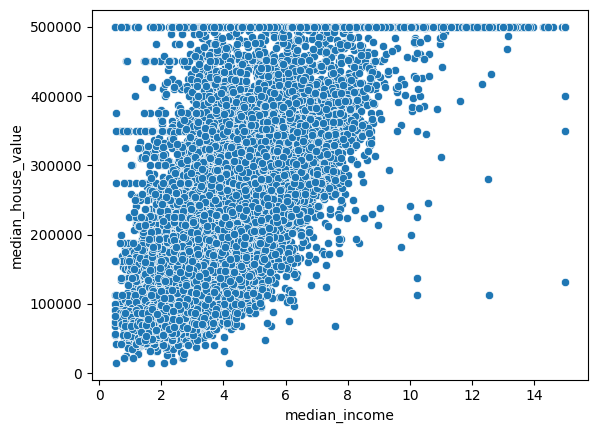

In [6]:
sns.scatterplot(x="median_income", y="median_house_value", data=house)

For the first graph, The dependent variable here is median_house_value and The independent variable is median_income. We want to check the relationship between these two variables and see how the house values are affected when the income of the resident increases.

<Axes: xlabel='population', ylabel='median_house_value'>

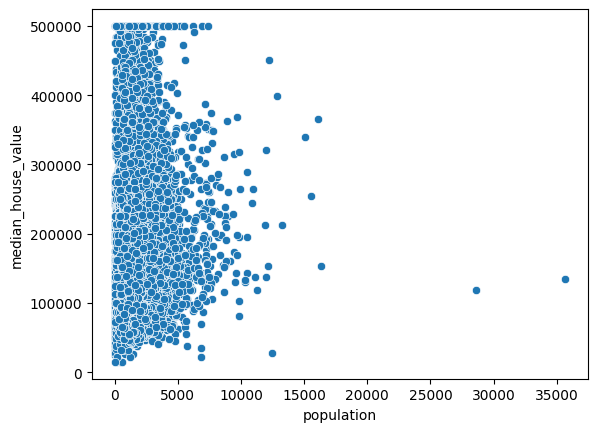

In [7]:
sns.scatterplot(x="population", y="median_house_value", data=house)

For the second graph, The dependent variable here is median_house_value(y-axis) and The independent variable has changed to the population(x-axis). We want to check the relationship between these two variables and see how the house values are affected when the population in the specific are is high.

<Axes: xlabel='households', ylabel='median_house_value'>

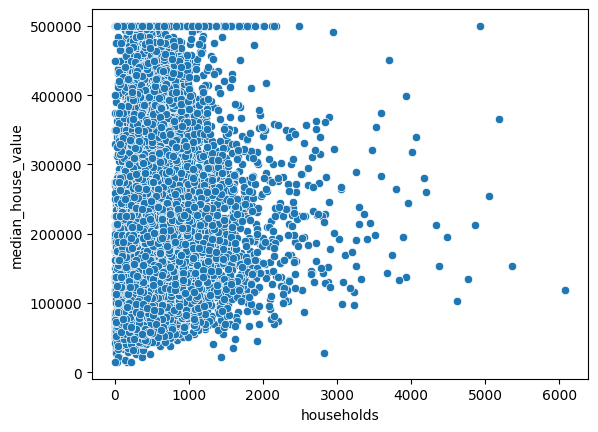

In [8]:
sns.scatterplot(x="households", y="median_house_value", data=house)

For the third graph, The dependent variable here is median_house_value(y-axis) and The independent variable has changed to the number to the number of households(x-axis).

Here 3 scatterplots have been plotted and There are 2 commons patterns in each graph.
* We see a crowded line at 500000 on the y-axis for the column value of median_house_value which suggests us that the dataset was capped at this particular value and it could mean that our dataset was large and had high values then 500000.
* Each graph has some outliers in the graph indicating that there could be some discrepnancy or noise in the data.

# Data Preprocessing : 
A process in which the data using by cleaning or transforming the data into usable form.

Filtering out the records with median_house_value = 500001 since it seems to be a capped for the median_house_value.

In [9]:
house_preprocessed = house[house.median_house_value != 500001]

In [10]:
print(f"After filtering, there are {len(house_preprocessed)} rows, versus {len(house)} before filtering")

After filtering, there are 19675 rows, versus 20640 before filtering


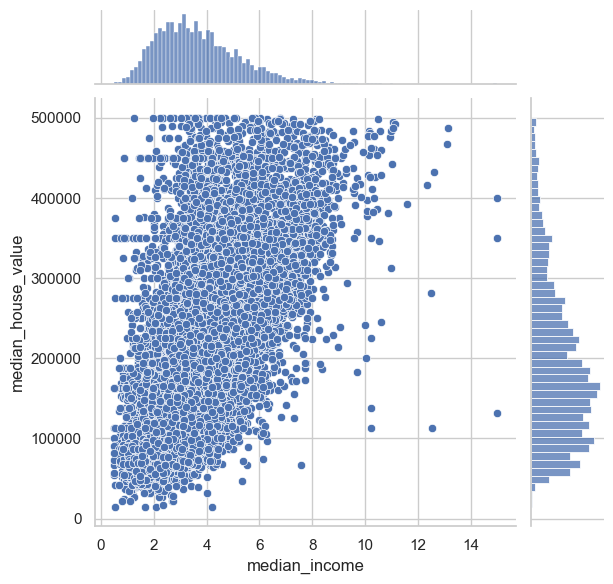

In [11]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="median_income", y="median_house_value", data=house_preprocessed)

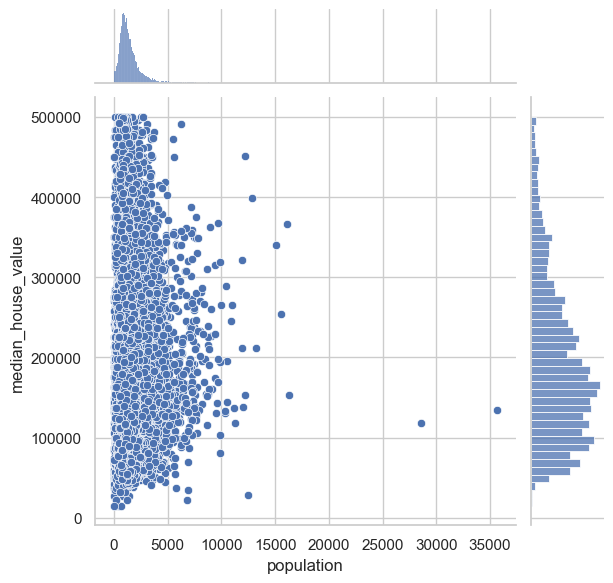

In [12]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="population", y="median_house_value", data=house_preprocessed)

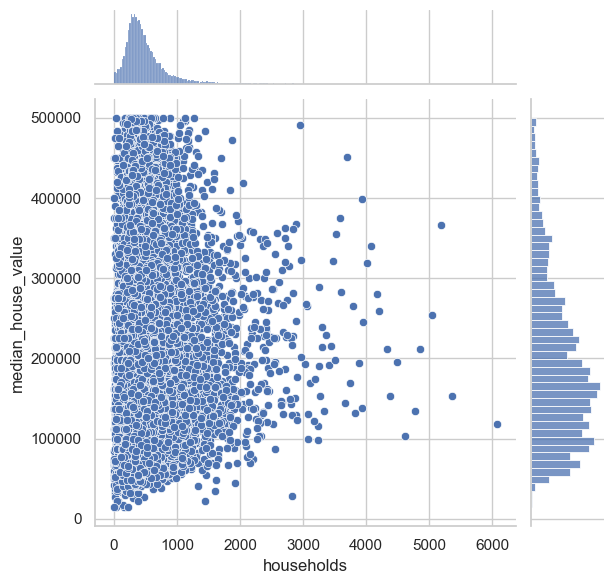

In [13]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="households", y="median_house_value", data=house_preprocessed)

After cleaning and filtering our dataset, the graphs display looks understandable and more defined.

# Train and Test Split

Splitting the data into training and testing sets. 
Use the first 80% of the data for training and 20% for the testing data.

In [14]:
train_size = int(len(house_preprocessed) * 0.8)
train = house_preprocessed[:train_size]
test = house_preprocessed[train_size:]

Using Scatter plot, train data in blue and test data in red in the same plot


Text(0.5, 1.0, 'Model 1 : Train and Test data')

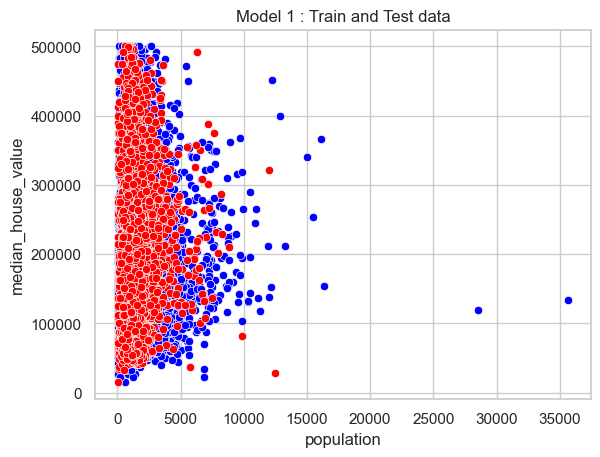

In [15]:
sns.scatterplot(x="population", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="population", y="median_house_value", data=test, color="red")
plt.title("Model 1 : Train and Test data")

Text(0.5, 1.0, 'Model 2 : Train and Test data')

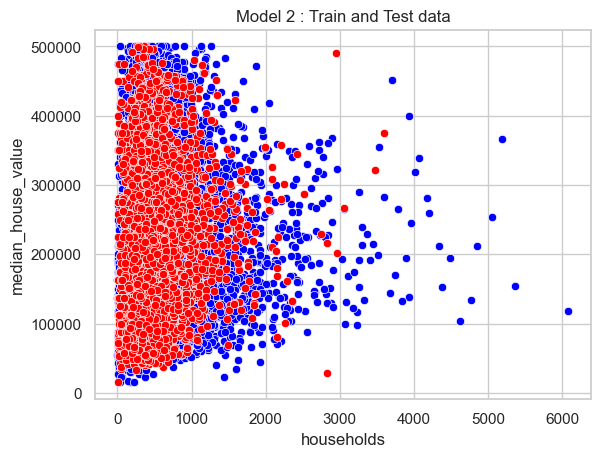

In [16]:
sns.scatterplot(x="households", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="households", y="median_house_value", data=test, color="red")
plt.title("Model 2 : Train and Test data")

Text(0.5, 1.0, 'Model 3 : Train and Test data')

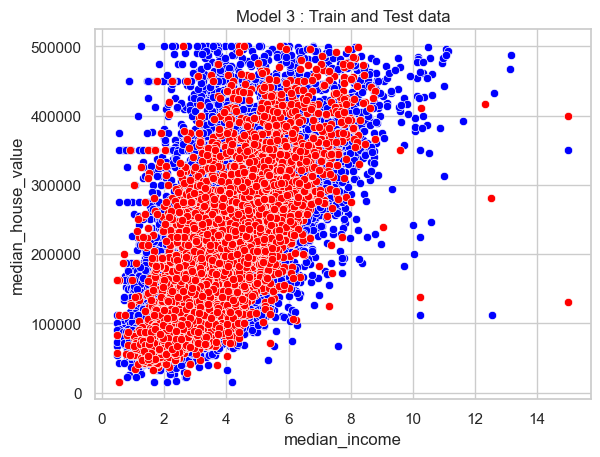

In [17]:
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")
plt.title("Model 3 : Train and Test data")

From each scatterplot, we can interpret that the result between training dataset(blue) and testing dataset(red) is similar

# Define a Model

To find the relationship between dependent variable and the independent variable we'll be using linear regression model

In [18]:
model1 = linear_model.LinearRegression() #median_house_value vs median_income
model2 = linear_model.LinearRegression() #median_house_value vs population
model3 = linear_model.LinearRegression() #median_house_value vs households

# Training the Model

In [19]:
model1.fit(X=train[["median_income"]], y=train[["median_house_value"]])

LinearRegression()

In [20]:
model2.fit(X=train[["population"]], y=train[["median_house_value"]])

LinearRegression()

In [21]:
model3.fit(X=train[["households"]], y=train[["median_house_value"]])

LinearRegression()

# Evaluate the Model

For the Train and Test data:

* Print the slope and intercept
* Plot the regression line on top of the scatter plot of the training data
* Print the Mean Squared Error (MSE) and the Mean Absolute Error (MAE)

In [22]:
# print coefficients
print(f"Intercept: {model1.intercept_}")
print(f"Coefficients: {model1.coef_}")

Intercept: [48204.53436817]
Coefficients: [[38702.97233842]]


In [23]:
# print coefficients
print(f"Intercept: {model2.intercept_}")
print(f"Coefficients: {model2.coef_}")

Intercept: [188081.58862584]
Coefficients: [[0.32862973]]


In [24]:
# print coefficients
print(f"Intercept: {model3.intercept_}")
print(f"Coefficients: {model3.coef_}")

Intercept: [177147.28853835]
Coefficients: [[22.62572591]]


In [25]:
predicted_value_y_m1 = 14*model1.coef_ + model1.intercept_
print("The predicted value of y for model 1:",predicted_value_y_m1)

The predicted value of y for model 1: [[590046.1471061]]


In [26]:
predicted_value_y_m2 = 20000*model2.coef_ + model2.intercept_
print("The predicted value of y for model 2:",predicted_value_y_m2)

The predicted value of y for model 2: [[194654.18316834]]


In [27]:
predicted_value_y_m3 = 4000*model3.coef_+model3.intercept_
print("The predicted value of y for model 3:",predicted_value_y_m3)

The predicted value of y for model 3: [[267650.19217299]]


# Finding MSE and MAE on Training dataset

In [29]:
print("Train set for Model 1:")
mse_model1_tr = mean_squared_error(train[['median_house_value']], model1.predict(train[['median_income']]))
mae_model1_tr = mean_absolute_error(train[['median_house_value']], model1.predict(train[['median_income']]))
print(f"Mean squared error: {mse_model1_tr}")
print(f"Mean absolute error: {mae_model1_tr}")

Train set for Model 1:
Mean squared error: 5557954319.259176
Mean absolute error: 55839.99864072871


In [30]:
print("Train set for Model 2:")
mse_model2_tr = mean_squared_error(train[['median_house_value']], model2.predict(train[['population']]))
mae_model2_tr = mean_absolute_error(train[['median_house_value']], model2.predict(train[['population']]))
print(f"Mean squared error: {mse_model2_tr}")
print(f"Mean absolute error: {mae_model2_tr}")

Train set for Model 2:
Mean squared error: 9236185598.969007
Mean absolute error: 75879.52660618868


In [31]:
print("Train set for Model 3:")
mse_model3_tr = mean_squared_error(train[['median_house_value']], model3.predict(train[['households']]))
mae_model3_tr = mean_absolute_error(train[['median_house_value']], model3.predict(train[['households']]))
print(f"Mean squared error: {mse_model3_tr}")
print(f"Mean absolute error: {mae_model3_tr}")

Train set for Model 3:
Mean squared error: 9156895298.287685
Mean absolute error: 75463.10651473372


# Finding MSE and MAE on Test dataset

In [147]:
print("Test set for Model 1:")
mse_model1_ts = mean_squared_error(test[['median_house_value']], model1.predict(test[['median_income']]))
mae_model1_ts = mean_absolute_error(test[['median_house_value']], model1.predict(test[['median_income']]))
print(f"Mean squared error: {mse_model1_ts}")
print(f"Mean absolute error: {mae_model1_ts}")

Test set for Model 1:
Mean squared error: 5831038297.419372
Mean absolute error: 59961.60099129183


The difference between the values of MSE and MAE for Model 1 train and test dataset is slightly high.

In [148]:
print("Test set for Model 2:")
mse_model2_ts = mean_squared_error(test[['median_house_value']], model2.predict(test[['population']]))
mae_model2_ts = mean_absolute_error(test[['median_house_value']], model2.predict(test[['population']]))
print(f"Mean squared error: {mse_model2_ts}")
print(f"Mean absolute error: {mae_model2_ts}")

Test set for Model 2:
Mean squared error: 10863782849.78328
Mean absolute error: 85178.9089807831


The difference between the values of MSE and MAE for Model 2 train and test dataset is slightly high.

In [149]:
print("Test set for Model 3:")
mse_model3_ts = mean_squared_error(test[['median_house_value']], model3.predict(test[['households']]))
mae_model3_ts = mean_absolute_error(test[['median_house_value']], model3.predict(test[['households']]))
print(f"Mean squared error: {mse_model3_ts}")
print(f"Mean absolute error: {mae_model3_ts}")

Test set for Model 3:
Mean squared error: 10759278800.526697
Mean absolute error: 84503.1472350856


The difference between the values of MSE and MAE for Model 3 train and test dataset is slightly high.

In [150]:
df = pd.DataFrame({"Models":["model1","model2","model3"],"Coefficient":[model1.coef_,model2.coef_,model3.coef_],
                   "Intercept":[model1.intercept_,model2.intercept_,model3.intercept_],"MSE Train":[mse_model1_tr,mse_model2_tr,mse_model3_tr],
                   "MAE Train":[mae_model1_tr,mae_model2_tr,mae_model3_tr],"MSE Test":[mse_model1_ts,mse_model2_ts,mse_model3_ts], 
                   "MAE Test":[mae_model1_ts,mae_model2_ts,mae_model3_ts]})
display(df)

,Models,Coefficient,Intercept,MSE Train,MAE Train,MSE Test,MAE Test
0,model1,[[38702.97233842378]],[48204.534368169785],5.557954e+09,55839.998641,5.831038e+09,59961.600991
1,model2,[[0.3286297271249774]],[188081.58862583563],9.236186e+09,75879.526606,1.086378e+10,85178.908981
2,model3,[[22.625725908661156]],[177147.28853834848],9.156895e+09,75463.106515,1.075928e+10,84503.147235


# Plotting the Regression line using train data

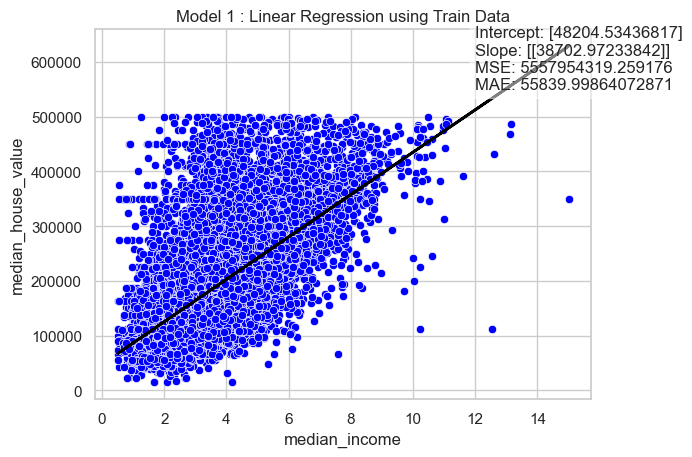

In [33]:
textstr01 = '\n'.join((
        f'Intercept: {model1.intercept_}',
        f'Slope: {model1.coef_}',
        f'MSE: {mse_model1_tr}',
        f'MAE: {mae_model1_tr}',
    ))
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
plt.plot(train[["median_income"]], model1.predict(train[["median_income"]]), color="black", linewidth=2)
plt.title("Model 1 : Linear Regression using Train Data")
plt.text(12, 550000, textstr01, fontsize=12, bbox=dict(facecolor="white", alpha=0.5))
plt.show()

The upward slope of the line indicated that the increase in the income of the residents has a strong effect on the prices of the houses.

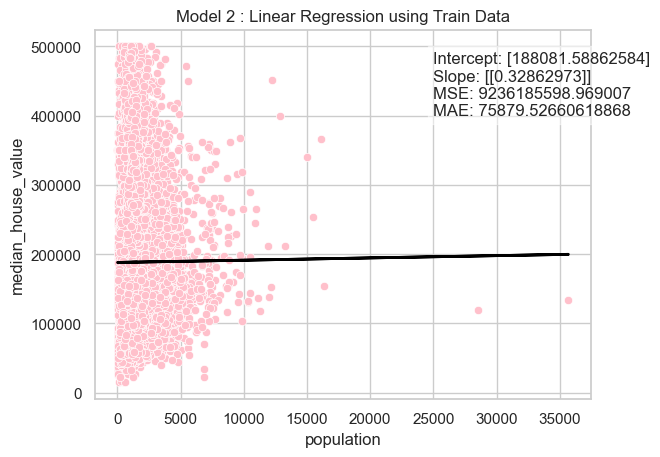

In [34]:
textstr02 = '\n'.join((
        f'Intercept: {model2.intercept_}',
        f'Slope: {model2.coef_}',
        f'MSE: {mse_model2_tr}',
        f'MAE: {mae_model2_tr}',
    ))
sns.scatterplot(x="population", y="median_house_value", data=train, color="pink")
plt.plot(train[["population"]], model2.predict(train[["population"]]), color="black", linewidth=2)
plt.title("Model 2 : Linear Regression using Train Data")
plt.text(25000, 400000, textstr02, fontsize=12, bbox=dict(facecolor="white", alpha=0.5))
plt.show()

The slope of the line almost parallel to x-axis which indicates that the increase in the population of specific area in california has very little effect on the prices of the houses.

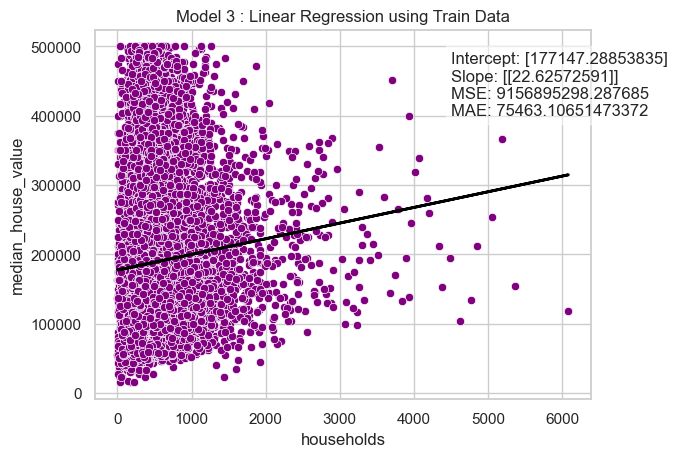

In [35]:
textstr03 = '\n'.join((
        f'Intercept: {model3.intercept_}',
        f'Slope: {model3.coef_}',
        f'MSE: {mse_model3_tr}',
        f'MAE: {mae_model3_tr}',
    ))
sns.scatterplot(x="households", y="median_house_value", data=train, color="purple")
plt.plot(train[["households"]], model3.predict(train[["households"]]), color="black", linewidth=2)
plt.title("Model 3 : Linear Regression using Train Data")
plt.text(4500, 400000, textstr03, fontsize=12, bbox=dict(facecolor="white", alpha=0.5))
plt.show()

# Plotting the Regression line using test data

Model 1 : Median_house_value Vs Median Income

Text(12, 505000, 'Intercept: [48204.53436817]\nSlope: [[38702.97233842]]\nMSE: 5831038297.419372\nMAE: 59961.60099129183')

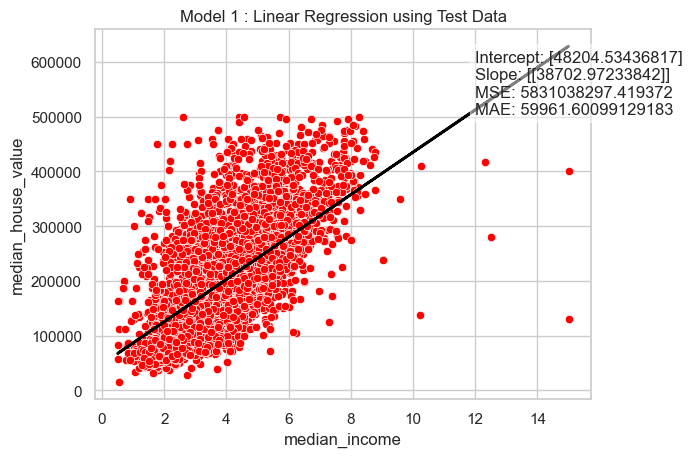

In [151]:
textstr1 = '\n'.join((
        f'Intercept: {model1.intercept_}',
        f'Slope: {model1.coef_}',
        f'MSE: {mse_model1_ts}',
        f'MAE: {mae_model1_ts}',
    ))
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")
plt.plot(test[["median_income"]], model1.predict(test[["median_income"]]), color="black", linewidth=2)
plt.title("Model 1 : Linear Regression using Test Data")
plt.text(12, 505000, textstr1, fontsize=12, bbox=dict(facecolor="white", alpha=0.5))

Our test data result is similar to the train data indicating that the increase of median_income as effect on the values of the median_house_value.

Model 2 : Median_house_value Vs Population

Text(8000, 405000, 'Intercept: [188081.58862584]\nSlope: [[0.32862973]]\nMSE: 10863782849.78328\nMAE: 85178.9089807831')

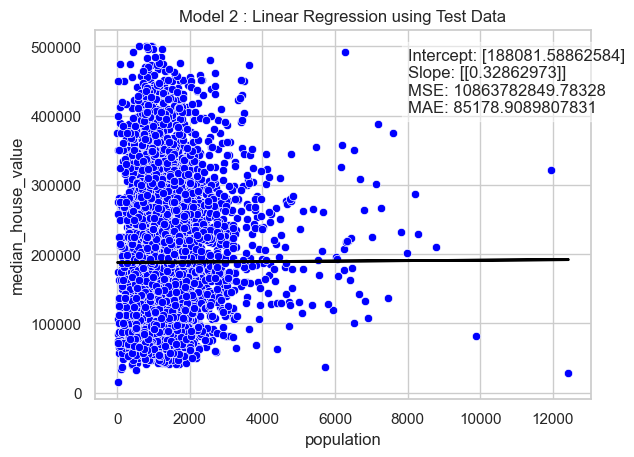

In [152]:
textstr2 = '\n'.join((
        f'Intercept: {model2.intercept_}',
        f'Slope: {model2.coef_}',
        f'MSE: {mse_model2_ts}',
        f'MAE: {mae_model2_ts}',
    ))
sns.scatterplot(x="population", y="median_house_value", data=test, color="blue")
plt.plot(test[["population"]], model2.predict(test[["population"]]), color="black", linewidth=2)
plt.title("Model 2 : Linear Regression using Test Data")
plt.text(8000, 405000, textstr2, fontsize=12, bbox=dict(facecolor="white", alpha=0.5))

As similar to the train data, the line is parallel to the x-axis which means increase in population has little to no-relation with the values of median_house_value.

Model 3 : Median_house_value Vs Households

Text(3000, 405000, 'Intercept: [177147.28853835]\nSlope: [[22.62572591]]\nMSE: 10759278800.526697\nMAE: 84503.1472350856')

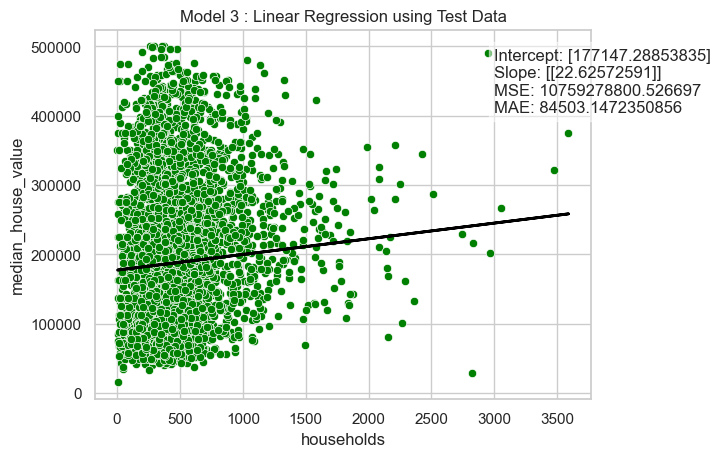

In [153]:
# plot the regression line against the test data
textstr3 = '\n'.join((
        f'Intercept: {model3.intercept_}',
        f'Slope: {model3.coef_}',
        f'MSE: {mse_model3_ts}',
        f'MAE: {mae_model3_ts}',
    ))
sns.scatterplot(x="households", y="median_house_value", data=test, color="green")
plt.plot(test[["households"]], model3.predict(test[["households"]]), color="black", linewidth=2)
plt.title("Model 3 : Linear Regression using Test Data")
plt.text(3000, 405000, textstr3, fontsize=12, bbox=dict(facecolor="white", alpha=0.5))

The line is trending slightly upwards indicating that the higher number of households does some effect on the house value.


# Conclusion

In this notebook, we built three different linear regression models to predict housing prices based on a single feature from the California Housing Prices dataset. After cleaning and exploring the data, we trained the model and evaluated its performance using Mean Squared and Absolute Error. Out of 3 independent variables, the income of residents and the number of households has some relationship with house prices, whereas the population has almost a relationship with it.